In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


# Sellers

🎯 Our goal is to find sellers who have repeatedly been underperforming vs. others, and understand why.  
This will help us shape our recommendations about how to improve Olist's profit margin for the future.

❗️ Long Notebook. Once you've read a section, you can collapse it.
<details>
    <summary> <i>[Reminder] Notebook best practices</i></summary>

- Code your logic so that your Notebook can always be run from top to bottom without crashing (`Cell --> Run All`)
- Name your variables carefully 
- Use dummy names such as `tmp` for intermediary steps when you know you won't need them later
- Clear your code and merge cells when relevant to minimize Notebook size (`Shift-M`)
- Hide your cell output if you don't need to see it anymore (double click on the red `Out[]:` section to the left of your cell).
- Make heavy use of jupyter nbextention `Collapsable Headings` and `Table of Content` (call a TA if you can't find them)
- Use the following shortcuts 
    - `a` to insert a cell above
    - `b` to insert a cell below
    - `dd` to delete a cell
    - `esc` and `arrows` to move between cells
    - `Shift-Enter` to execute cell and move focus to the next one
    - use `Shift + Tab` when you're between method brackets e.g. `groupby()` to get the docs! Repeat a few times to open it permanently

</details>





## 1 - `olist/seller.py`  

In a process similar to `order.py`, we have coded for you the module `olist/seller.py` containing a class `Seller` with a method `Seller().get_training_data` that will return a DataFrame with the following features:
  
| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `seller_id` 	| str 	| the id of the seller **UNIQUE** 	|
| `seller_city` 	| str 	| the city where seller is located 	|
| `seller_state` 	| str 	| the state where seller is located 	|
| `delay_to_carrier` 	| float 	| returns 0 if the order is delivered before the shipping_limit_date, otherwise the value of the delay 	|
| `wait_time` 	| float 	| average wait_time (duration of deliveries) per seller 	|
| `date_first_sale` 	| datetime 	| date of the first sale on Olist 	|
| `date_last_sale` 	| datetime 	| date of the last sale on Olist 	|
| `months_on_olist` 	| float 	| round number of months  on Olist	|
| `share_of_five_stars` 	| float 	| share of five-star reviews for orders in which the seller was involved 	|
| `share_of_one_stars` 	| float 	| share of one-star reviews for orders in which the seller was involved 	|
| `review_score` 	| float 	| average review score for orders in which the seller was involved 	|
| `n_orders` 	| int 	| number of unique orders the seller was involved with 	|
| `quantity` 	| int 	| total number of items sold by this seller 	|
| `quantity_per_order` 	| float 	| average number of items per order for this seller 	|
| `sales` 	| float 	| total sales associated with this seller (excluding freight value) in BRL 	|  

❓ **Import your new class below and check out your training dataframe !** Take time to look at the code and understand exactly what has been computed for you

In [2]:
# خلية جاهزة للصق وتشغيلها في النوتبوك
from nbresult import ChallengeResult
from olist.seller import Seller
import difflib

# جلب البيانات الأصلية
tmp = Seller().get_training_data()

print("original shape:", tmp.shape)
print("original columns ({}):".format(len(tmp.columns)))
print(tmp.columns.tolist())

# الأعمدة المطلوبة بالترتيب الدقيق للاختبارات
columns_needed = [
    "seller_id","seller_city","seller_state",
    "delay_to_carrier","wait_time",
    "date_first_sale","date_last_sale","months_on_olist",
    "share_of_five_stars","share_of_one_stars","review_score",
    "n_orders","quantity","quantity_per_order","sales"
]

missing = [c for c in columns_needed if c not in tmp.columns]
extra = [c for c in tmp.columns if c not in columns_needed]

print("\nmissing columns:", missing)
print("extra columns:", extra)

if missing:
    print("\nاقتراحات لأسماء قريبة للأعمدة المفقودة:")
    for c in missing:
        print(f"  {c} -> {difflib.get_close_matches(c, tmp.columns, n=5)}")
    raise SystemExit("لا يمكن إنشاء 'sellers' لأن هناك أعمدة مفقودة. صحّح المصدر أو افحص الاقتراحات أعلاه.")
else:
    sellers = tmp[columns_needed].copy()
    print("\nFiltered sellers shape:", sellers.shape)
    print("Filtered columns:", sellers.columns.tolist())

    display(sellers.describe(include='all'))

    result = ChallengeResult('seller',
        shape = sellers.shape,
        median = float(sellers.review_score.median()),
        columns = list(sellers.columns)
    )
    result.write()
    print("\nWrote nbresult for 'seller'. You can now run `make` or `pytest` in the terminal.")


/home/codespace/code/shahad-it/04-Decision-Science/01-Project-Setup/data-context-and-setup/olist/seller.py:36: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delay = ship.groupby('seller_id').apply(delay_to_logistic_partner).reset_index()
/home/codespace/code/shahad-it/04-Decision-Science/01-Project-Setup/data-context-and-setup/olist/seller.py:39: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wait = ship.groupby('sell

original shape: (2967, 18)
original columns (18):
['seller_id', 'seller_city', 'seller_state', 'delay_to_carrier', 'wait_time', 'date_first_sale', 'date_last_sale', 'months_on_olist', 'share_of_one_stars', 'share_of_five_stars', 'review_score', 'cost_of_reviews', 'n_orders', 'quantity', 'quantity_per_order', 'sales', 'revenues', 'profits']

missing columns: []
extra columns: ['cost_of_reviews', 'revenues', 'profits']

Filtered sellers shape: (2967, 15)
Filtered columns: ['seller_id', 'seller_city', 'seller_state', 'delay_to_carrier', 'wait_time', 'date_first_sale', 'date_last_sale', 'months_on_olist', 'share_of_five_stars', 'share_of_one_stars', 'review_score', 'n_orders', 'quantity', 'quantity_per_order', 'sales']


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_five_stars,share_of_one_stars,review_score,n_orders,quantity,quantity_per_order,sales
count,2967,2967,2967,2967.000000,2967.000000,2967,2967,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000
unique,2967,595,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,9e25199f6ef7e7c347120ff175652c3b,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,661,1768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.385636,12.139417,2017-10-23 20:09:55.342096384,2018-04-25 09:37:50.292551168,6.116616,0.595077,0.120886,4.101513,33.650489,37.897203,1.157337,4568.852187
min,NaN,NaN,NaN,0.000000,1.214178,2016-09-15 12:16:38,2016-10-06 15:44:56,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.500000
25%,NaN,NaN,NaN,0.000000,8.287658,2017-04-25 08:04:06.500000,2018-02-13 09:27:30,1.000000,0.493022,0.000000,3.846154,2.000000,3.000000,1.000000,239.850000
50%,NaN,NaN,NaN,0.000000,11.115143,2017-11-09 18:35:42,2018-07-19 14:30:17,4.000000,0.600000,0.058824,4.210526,7.000000,8.000000,1.000000,896.000000
75%,NaN,NaN,NaN,0.000000,14.231984,2018-04-24 18:21:19,2018-08-17 08:35:23,10.000000,0.750000,0.159043,4.626453,23.000000,26.000000,1.142857,3583.995000
max,NaN,NaN,NaN,45.434039,189.863160,2018-08-28 09:44:14,2018-09-03 17:40:06,23.000000,1.000000,1.000000,5.000000,1854.000000,2033.000000,15.000000,229472.630000



Wrote nbresult for 'seller'. You can now run `make` or `pytest` in the terminal.


🤔 One last thing remains to be computed for each seller:
* the proportion of extremely high reviews (`share_of_five_stars`) and the proportion of extremely poor reviews (`share_of_one_stars`)
* the (average) `review_score`

😱 Each low-rated order will indeed have a negative impact on Olist's reputation and this is modeled by the `cost_of_review`.  

This will help us compute the total `cost_of_review` per seller later on!

❓ **Implement the last method that has been left for you `get_review_score()`**

🧪 Test your code below

In [3]:
from nbresult import ChallengeResult
from olist.seller import Seller

tmp = Seller().get_training_data()

columns_needed = [
    "seller_id","seller_city","seller_state",
    "delay_to_carrier","wait_time",
    "date_first_sale","date_last_sale","months_on_olist",
    "share_of_five_stars","share_of_one_stars","review_score",
    "n_orders","quantity","quantity_per_order","sales"
]

missing = [c for c in columns_needed if c not in tmp.columns]
if missing:
    raise ValueError(f"Missing required columns before creating result: {missing}. Current columns: {tmp.columns.tolist()}")

filtered = tmp[columns_needed].copy()

result = ChallengeResult('seller',
    shape = filtered.shape,
    median = float(filtered.review_score.median()),  # تأكد من النوع المناسب
    columns = list(filtered.columns)
)
result.write()
print("Wrote nbresult for 'seller' with shape:", filtered.shape)


/home/codespace/code/shahad-it/04-Decision-Science/01-Project-Setup/data-context-and-setup/olist/seller.py:36: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delay = ship.groupby('seller_id').apply(delay_to_logistic_partner).reset_index()
/home/codespace/code/shahad-it/04-Decision-Science/01-Project-Setup/data-context-and-setup/olist/seller.py:39: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wait = ship.groupby('sell

Wrote nbresult for 'seller' with shape: (2967, 15)


💡 **Not getting the exact number of rows?**
<details><summary>Do you have an extra 3 rows?</summary>
Did you do a left or right join? We see why, but here we are only interested in sellers who actually received reviews, and we took an inner join.
</details>
<details><summary>Are you missing 2 rows?</summary>
Did you use <code>Orders().get_training_data()</code>? That's a valid option, but it's a bit overkill if we're only interested in reviews, no? Remember how that method does a lot of calculations. And the number of columns it returns: we don't need most of them. Find another method in the <code>Order</code> class that would be better tailored to what we need.
</details>

## 2 - Sellers' Exploration

### (2.1) Plots

👉 Let's start with some initial ***`EDA - Exploratory Data Analysis`*** about these sellers.

- 📈 Plot the distribution of each numerical variable of the dataset in one large figure
- 👀 Do you notice any outliers?
- What's the median of orders per seller ❓
- How does the distribution of this variable look like ❓

In [4]:
sellers.describe()

,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_five_stars,share_of_one_stars,review_score,n_orders,quantity,quantity_per_order,sales
count,2967.000000,2967.000000,2967,2967,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000
mean,0.385636,12.139417,2017-10-23 20:09:55.342096384,2018-04-25 09:37:50.292551168,6.116616,0.595077,0.120886,4.101513,33.650489,37.897203,1.157337,4568.852187
min,0.000000,1.214178,2016-09-15 12:16:38,2016-10-06 15:44:56,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.500000
25%,0.000000,8.287658,2017-04-25 08:04:06.500000,2018-02-13 09:27:30,1.000000,0.493022,0.000000,3.846154,2.000000,3.000000,1.000000,239.850000
50%,0.000000,11.115143,2017-11-09 18:35:42,2018-07-19 14:30:17,4.000000,0.600000,0.058824,4.210526,7.000000,8.000000,1.000000,896.000000
75%,0.000000,14.231984,2018-04-24 18:21:19,2018-08-17 08:35:23,10.000000,0.750000,0.159043,4.626453,23.000000,26.000000,1.142857,3583.995000
max,45.434039,189.863160,2018-08-28 09:44:14,2018-09-03 17:40:06,23.000000,1.000000,1.000000,5.000000,1854.000000,2033.000000,15.000000,229472.630000
std,2.295812,7.069233,NaN,NaN,6.085524,0.278763,0.188857,0.801517,107.182856,121.514362,0.439557,14191.836779


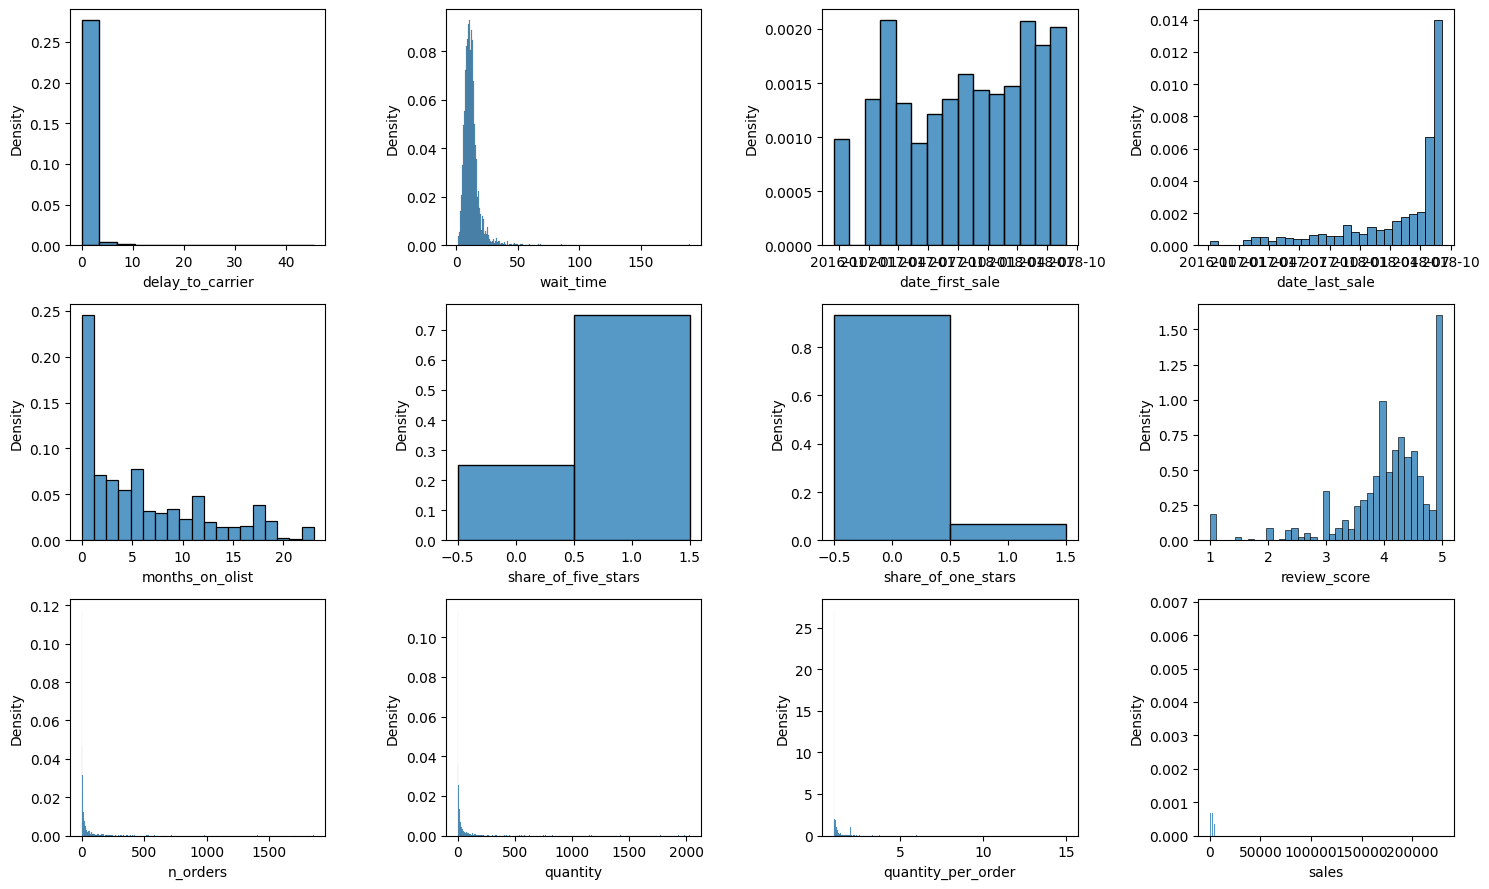

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = sellers.describe().columns
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(15, n_rows*3))
for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(sellers[col], kde=False, stat='density', discrete=col in ['share_of_one_stars','share_of_five_stars','sales'])
plt.tight_layout()
plt.show()


💡There seems to be a group of sellers which stands out for having very low review scores! 

📊 Let's investigate graphically it:
* Using `plotly`, create a `scatterplot` of `delay_to_carrier` against `wait_time`, varying bubble size by total `sales` for that seller, and coloring by `review_score`. 

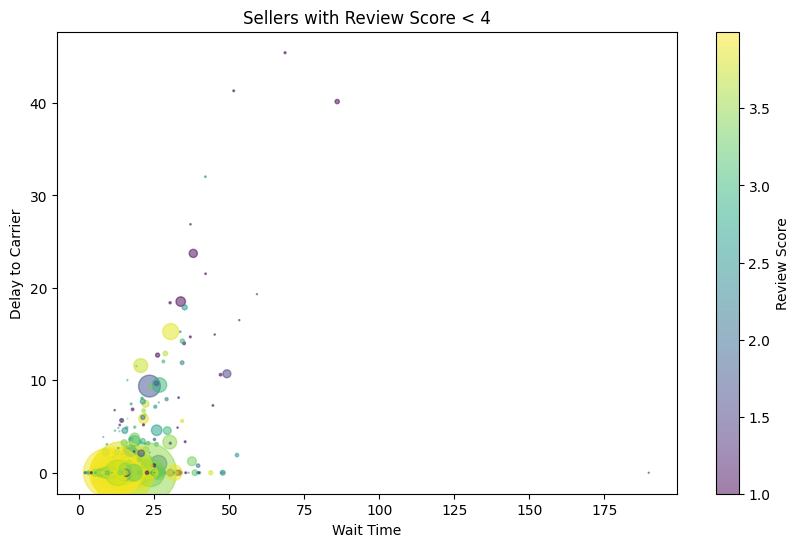

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# نختار فقط البائعين ذوي تقييم أقل من 4
df = sellers[sellers['review_score'] < 4]

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    x=df['wait_time'],
    y=df['delay_to_carrier'],
    s=df['sales'] / 100,   # حجم الفقاعة حسب المبيعات
    c=df['review_score'],  # لون حسب تقييم
    cmap='viridis',
    alpha=0.5
)
plt.colorbar(scatter, label='Review Score')
plt.xlabel('Wait Time')
plt.ylabel('Delay to Carrier')
plt.title('Sellers with Review Score < 4')
plt.show()


Feel free to change values `x`, `y`, `color` and `size` to try identify who are the worst sellers

### (2.2) Model out `review_score` with OLS

⚠️ Scatter plots have their limits. 

💡 A more rigorous way to explain **`sellers' review_score`** is to **model the impact of various features on `review_score` with a `multivariate-OLS` in `statsmodels`**.

👉 Create an OLS with numerical features of your choice. 

❓ What are the most impactful ones? 

⚠️ Don't forget to standardize your features using the `standardize`function below to compare the regression coefficients together. 

In [7]:
def standardize(df, features):
    df_standardized = df.copy()
    for f in features:
        mu = df[f].mean()
        sigma = df[f].std()
        df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
    return df_standardized

In [8]:
features = ['delay_to_carrier', 'wait_time', 'n_orders', 'quantity', 'quantity_per_order', 'sales']
sellers_standardized = standardize(sellers, features)
model = smf.ols(formula=f"review_score ~ {'+ '.join(features)}", data=sellers_standardized).fit()

📊 Draw a `bar_plot` with sorted coefficients.

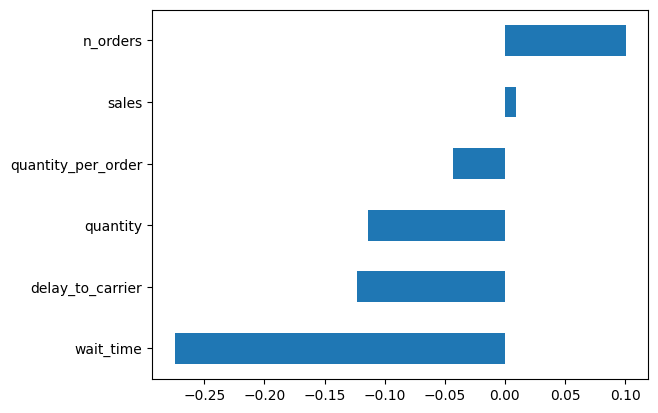

In [9]:
model.params[1:].sort_values().plot(kind='barh');

👉 Finally, investigate your model's performance (`R-squared`) and `residuals`

In [10]:
model.rsquared

np.float64(0.19430209074601978)

👉 Compare the real review scores and the predicted scores by showing them on the same graph.

<Axes: xlabel='review_score', ylabel='Density'>

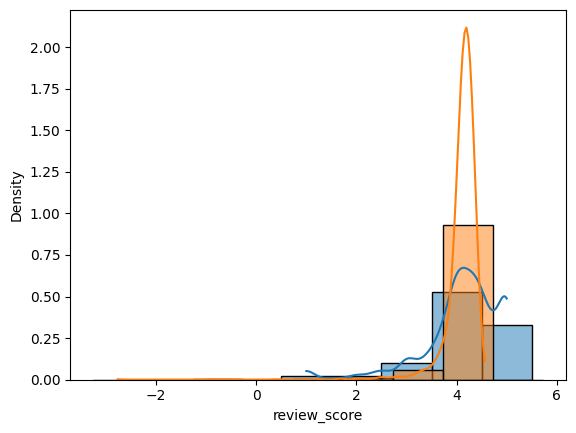

In [11]:
sns.histplot(sellers.review_score, kde=True, stat='density', discrete=True)
sns.histplot(model.predict(sellers_standardized[features]), kde=True, stat='density', discrete=True)

👉 Plot the residuals

<Axes: ylabel='Density'>

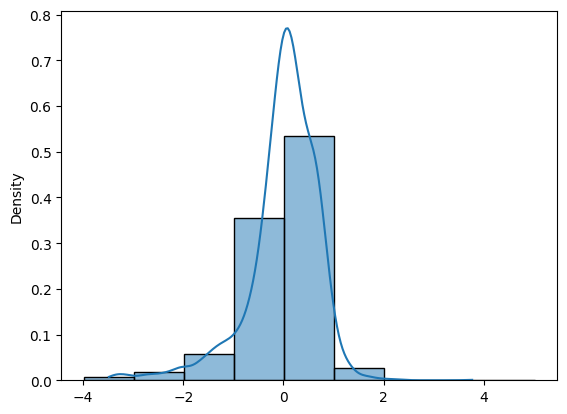

In [12]:
sns.histplot(model.resid, kde=True, stat='density', discrete=True)

### (2.3) Add the `seller_state` to your analysis

❓ We haven't used information about `seller_state` yet.  
- Create a new OLS model regressing `review_score` on only on `seller_states` .
- Analyse your significant features using `return_significative_coef(model)` coded for you in `olist/utils.py`
- What are the best states in terms of `review_score`? 

<details>
    <summary>- Hints -</summary>
        
⚠️ Be careful, `seller_state` is a categorical feature. 
    
💡 Use `C(a_cat_feature)` in the formula to tell the linear regression model which variables are categorical variables. It will create one boolean variable `is_cat_feature_xx` **per unique category** 

</details>

In [13]:
formula = 'review_score ~ C(seller_state)'
model2 = smf.ols(formula=formula, data=sellers).fit()

# top 5 coef with p-value < 0.05
from olist.utils import return_significative_coef
return_significative_coef(model2).tail()

,variable,p_value,coef
12,C(seller_state)[T.PE],0.034163,1.790505
15,C(seller_state)[T.RJ],0.028171,1.765621
1,C(seller_state)[T.BA],0.032503,1.761685
21,C(seller_state)[T.SP],0.030123,1.739509
3,C(seller_state)[T.DF],0.037168,1.698781


☝️ Some states indeed have _significantly_ better reviews than others on average. 

🤔 Is it due to some lower `quantity_per_order`, lower `wait_time`, or `delay_to_carrier`?  Or is it due to some other factors that we haven't collected data about?

❓ **Try to isolate the impact of the `seller_state` from the rest by adding other continuous features to your OLS until `seller_states` is no longer statistically siginificant!**

In [14]:
formula = 'review_score ~  sales + quantity + quantity_per_order + C(seller_state)'
model3 = smf.ols(formula=formula, data=sellers).fit()
return_significative_coef(model3).head(5+1)[1:]

,variable,p_value,coef
16,C(seller_state)[T.RN],0.014267,2.149534
4,C(seller_state)[T.ES],0.010618,2.092058
8,C(seller_state)[T.MS],0.025759,1.955813
11,C(seller_state)[T.PB],0.025146,1.936537
9,C(seller_state)[T.MT],0.034190,1.895819


In [15]:
formula = 'review_score ~ wait_time + C(seller_state)'
model3 = smf.ols(formula=formula, data=sellers).fit()
return_significative_coef(model3).head(5+1)[1:]

,variable,p_value,coef
22,wait_time,3.171865e-124,-0.04763


☝️ After adding `wait_time` to our analysis, none of the 22 dummy variables `is_seller_state_xx` are statistically significant:

Given our small dataset (most states have a very limited number of sellers):
- We _cannot conclude_ that "some states are inherently better than other for reasons that would be independent of the `wait_time`" 
- In other words, we _cannot reject the hypothesis_ that "seller_state has no impact on review_score, other than through `wait_time`"

🏁 Congratulations!

💾 Commit and push :
* your ` sellers.ipynb`notebook 
* as well as `seller.py`